In [1]:
import pandas as pd
from looper import Looper
from PIL import Image
import numpy as np

from models import CNN_Encoder, RNN_Decoder, image_features_extract_model

In [2]:
looper = Looper(CNN_Encoder, RNN_Decoder, image_features_extract_model)

Training with the following params:
VOCAB_SIZE : 5000
BATCH_SIZE : 32
BUFFER_SIZE : 5000
embedding_dim : 512
embedding_words : 300
units : 512
embedding_size : 5001
MAX_LENGTH : 20
TOKENIZER_FOLDER : ./tokenizer/
TOKENIZER_NAME : spbe_tokenizer.e
CHECKPOINT_FOLDER : saved_models
## Run set_params to change params ##


In [3]:
tokenizer = looper.load_tokenizer()

loading from ./tokenizer/spbe_tokenizer.e


In [4]:
looper.params

{'VOCAB_SIZE': 5000,
 'BATCH_SIZE': 32,
 'BUFFER_SIZE': 5000,
 'embedding_dim': 512,
 'embedding_words': 300,
 'units': 512,
 'embedding_size': 5001,
 'MAX_LENGTH': 20,
 'TOKENIZER_FOLDER': './tokenizer/',
 'TOKENIZER_NAME': 'spbe_tokenizer.e',
 'CHECKPOINT_FOLDER': 'saved_models'}

In [5]:
# CHANGE PARAMS

params = {'VOCAB_SIZE': 5000,
 'BATCH_SIZE': 32,
 'BUFFER_SIZE': 5000,
 'embedding_dim': 1024,
 'embedding_words': 300,
 'units': 768,
 'embedding_size': 5001,
 'MAX_LENGTH': 20,
 'TOKENIZER_FOLDER': './tokenizer/',
 'TOKENIZER_NAME': 'spbe_tokenizer.e',
 'CHECKPOINT_FOLDER': './checkpoint_dis/1024_embed_758_units'}

params = looper.set_params(params)

Training with the following params:
VOCAB_SIZE : 5000
BATCH_SIZE : 32
BUFFER_SIZE : 5000
embedding_dim : 1024
embedding_words : 300
units : 768
embedding_size : 5001
MAX_LENGTH : 20
TOKENIZER_FOLDER : ./tokenizer/
TOKENIZER_NAME : spbe_tokenizer.e
CHECKPOINT_FOLDER : ./checkpoint_dis/1024_embed_758_units
## Run set_params to change params ##


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6b0731d68>]],
      dtype=object)

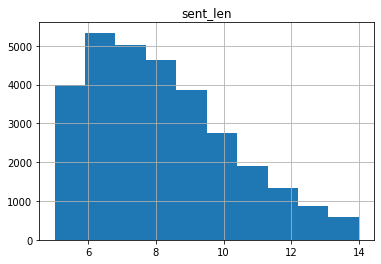

In [6]:
data = pd.read_csv('val.csv')
captions_val = data.title.to_list()
images_val = data.paths.to_list()

data = pd.read_csv('train.csv')
data['captions'] =  data['captions'].astype(str)
data['sent_len'] = data['captions'].apply(lambda r: len(r.split(' ')))
data = data[(data['sent_len']<20) & (data['sent_len']>4)]
captions_train = data.title.to_list()
images_train = data.paths.to_list()
data.hist('sent_len')

In [7]:
dataset_val = looper.make_dataset(images_val,captions_val)

max title len 20
len titles: 2375,len images: 2375
captions vector shape (2375, 20)
NOT using augmentations in loader


In [8]:
dataset_train = looper.make_dataset(images_train, captions_train, loader_type='aug')

max title len 20
len titles: 29254,len images: 29254
captions vector shape (29254, 20)
Using augmentations in loader


In [9]:
looper.train(dataset_train, dataset_val, 50, save_n=3)

Epoch 1 Batch 0 Loss 3.2572
Epoch 1 Batch 100 Loss 2.0046
Epoch 1 Batch 200 Loss 1.6458
Epoch 1 Batch 300 Loss 1.5484
Epoch 1 Batch 400 Loss 1.5674
Epoch 1 Batch 500 Loss 1.5919
Epoch 1 Batch 600 Loss 1.2449
Epoch 1 Batch 700 Loss 1.4468
Epoch 1 Batch 800 Loss 1.1928
Epoch 1 Batch 900 Loss 1.3135
precision at | val: 0.19958333333333333, train: 0.21483379426549692
Epoch 1 Loss 2.481881
Time taken for 1 epoch 375.57119369506836 sec

Epoch 2 Batch 0 Loss 1.4424
Epoch 2 Batch 100 Loss 1.6256
Epoch 2 Batch 200 Loss 1.3199
Epoch 2 Batch 300 Loss 1.3843
Epoch 2 Batch 400 Loss 1.2500
Epoch 2 Batch 500 Loss 1.3971
Epoch 2 Batch 600 Loss 1.4320
Epoch 2 Batch 700 Loss 1.4646
Epoch 2 Batch 800 Loss 1.3011
Epoch 2 Batch 900 Loss 1.4518
Epoch 2 Loss 2.181659
Time taken for 1 epoch 212.70222282409668 sec

Epoch 3 Batch 0 Loss 1.3638
Epoch 3 Batch 100 Loss 1.4654
Epoch 3 Batch 200 Loss 1.1893
Epoch 3 Batch 300 Loss 1.3146
Epoch 3 Batch 400 Loss 1.3052
Epoch 3 Batch 500 Loss 1.3641
Epoch 3 Batch 600 Lo

# CHECK VAL

Real Caption: how to avoid a potential pedophile
0.5, what to do if your shitpost horriails doess the local female tool pegging., score 1
0.7, what to do if your shitpost cause feelings this plan , score 1
0.9, what to do if your shitpost horriails does not to karky eye to like you love, score 1
1, what to do if your shitpost horriails doess the asshole on november , score 1


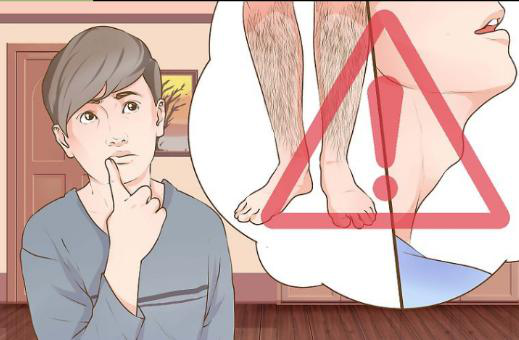

In [293]:
#### captions on the validation set

#img_name_val, cap_val
rid = np.random.randint(0, len(captions_val))
image = images_val[rid] #'./img.jpg' #
real_caption = captions_val[rid]
print ('Real Caption:', real_caption)

at_k = 5 # use 5 first words to compute score
seed = None #'▁cat'

for t in [0.5,0.7,0.9,1]:
    predicted_ids, a = looper.predict_one(image, t, argmax =2, seed=seed)
    real_cap = set(real_caption.split(' '))
    predicted_cap =  looper.tokenizer.decode(predicted_ids)
    score = len(real_cap.intersection(set(predicted_cap.split(' ')[:at_k]))) #/len(word)
    print(f"{t}, {predicted_cap}, score {score}")
Image.open(image)

seed : ▁computer
0.5, computer how to accept your shadow people , score 3
seed : ▁computer
0.7, computer how to pay full bieet your right shortage , score 2
seed : ▁computer
0.9, computer how to work up with a more outfit to get out of any 1 , score 2
seed : ▁computer
1, computer how to accept your shadow people , score 3


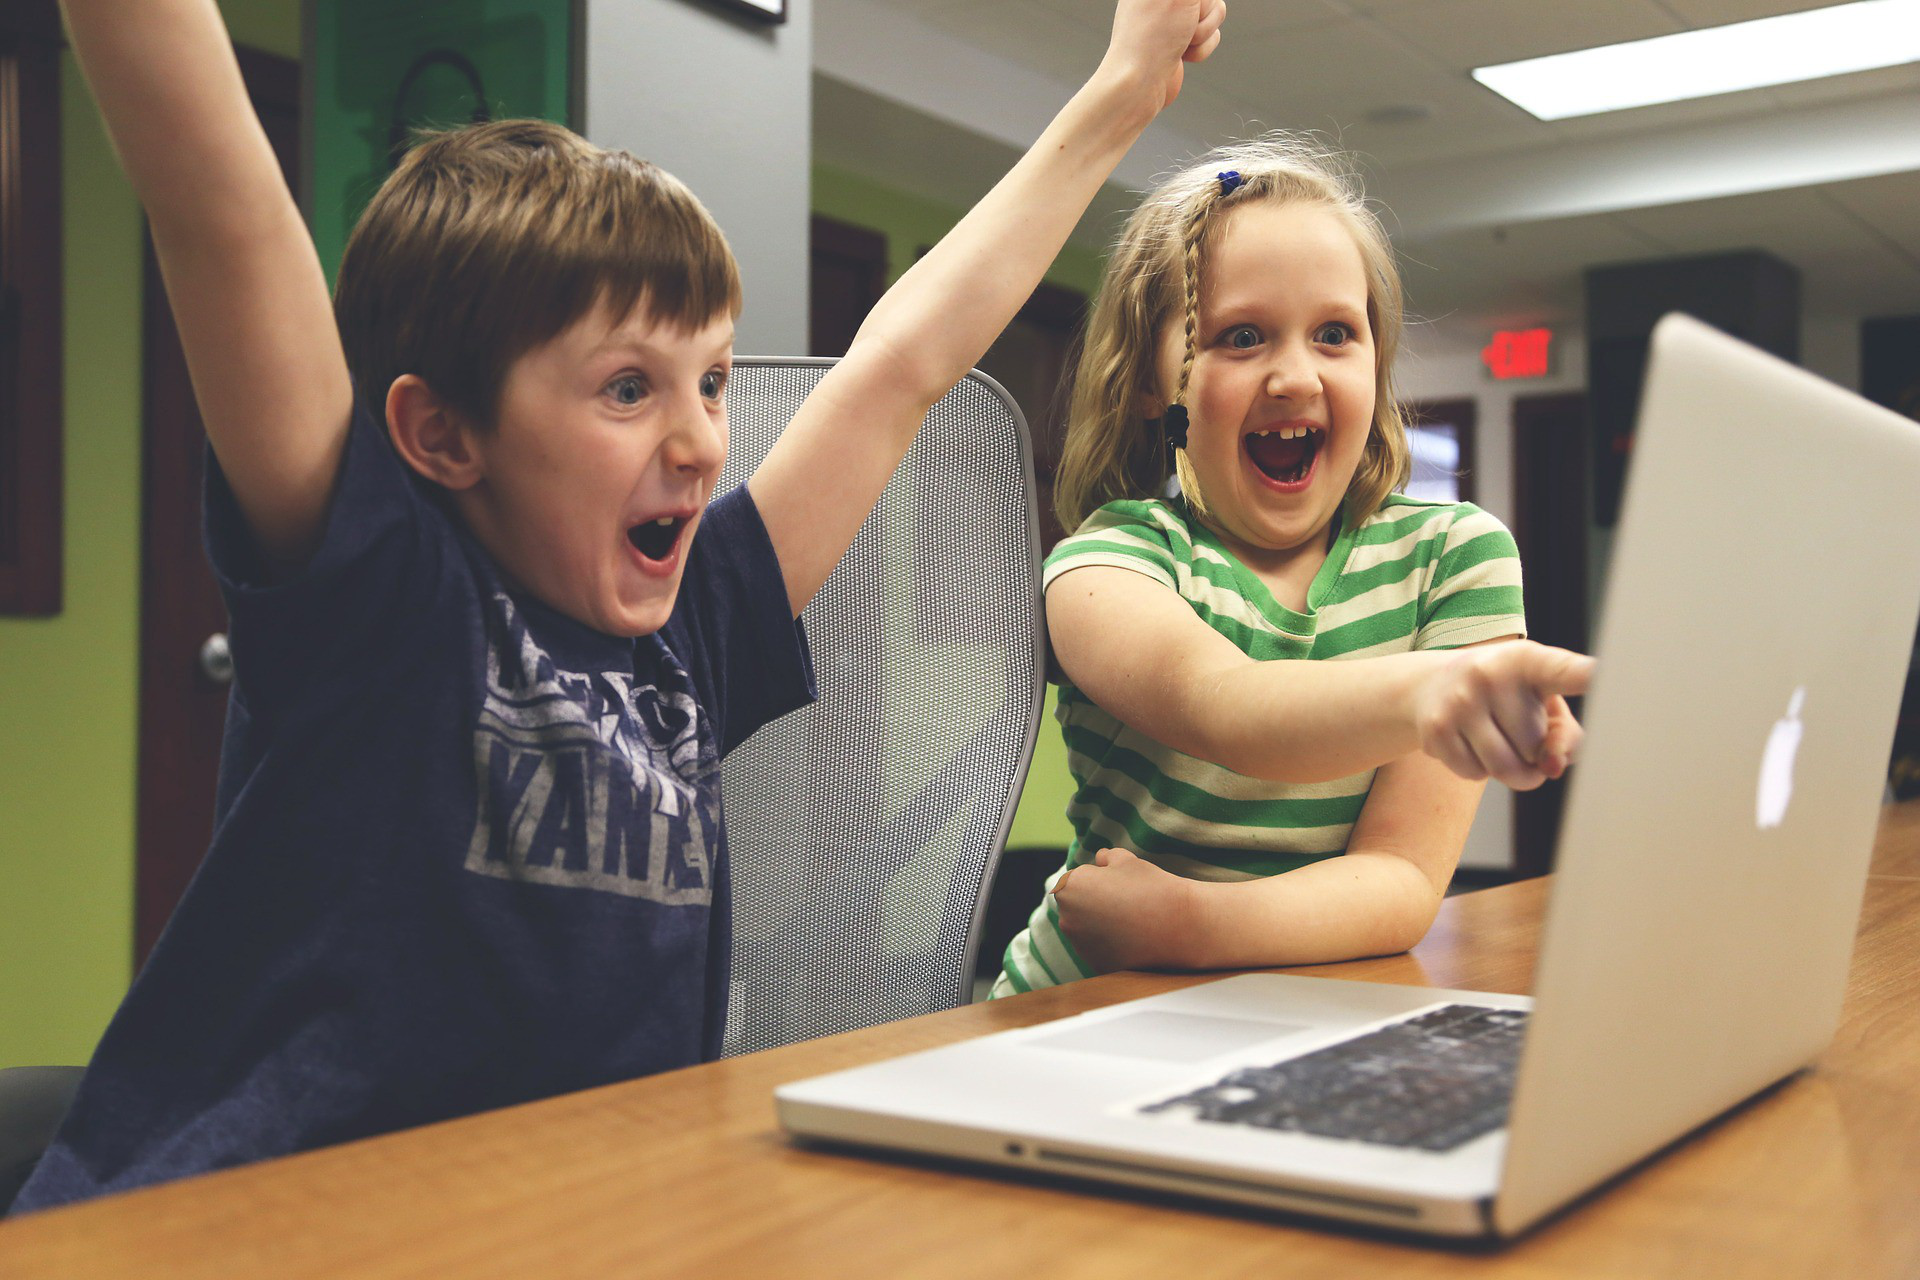

In [163]:
#### captions on the validation set

#img_name_val, cap_val
#rid = np.random.randint(0, len(captions_val))
image =  './kids.jpeg' #images_val[rid]
#real_caption = captions_val[rid]
#print ('Real Caption:', real_caption)

at_k = 5 # use 5 first words to compute score
seed = '▁computer'  #None #  

for t in [0.5,0.7,0.9,1]:
    predicted_ids, a = looper.predict_one(image, t, argmax =2, seed=seed)
    real_cap = set(real_caption.split(' '))
    predicted_cap =  looper.tokenizer.decode(predicted_ids)
    score = len(real_cap.intersection(set(predicted_cap.split(' ')[:at_k]))) #/len(word)
    print(f"{t}, {predicted_cap}, score {score}")
Image.open(image)

### CHECK TRAIN

Real Caption: how to dance to my mixtape
0.5, how to dance to my mixtape , score 4
0.7, how to dance to my mixtape , score 4
0.9, how to dance to my mixtape , score 4
1, how to dance to my mixtape , score 4


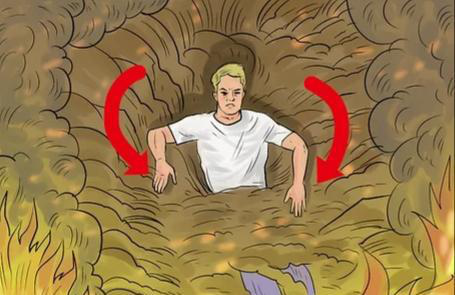

In [196]:
#### captions on the validation set

#img_name_val, cap_val
rid = np.random.randint(0, len(captions_train))
image = images_train[rid] #'./img.jpg' #
real_caption = captions_train[rid]
print ('Real Caption:', real_caption)

at_k = 5 # use 5 first words to compute score
seed = None #'▁cat'

for t in [0.5,0.7,0.9,1]:
    predicted_ids, a = looper.predict_one(image, t, argmax =2, seed=seed)
    real_cap = set(real_caption.split(' '))
    predicted_cap =  looper.tokenizer.decode(predicted_ids)
    score = len(real_cap.intersection(set(predicted_cap.split(' ')[:at_k]))) #/len(word)
    print(f"{t}, {predicted_cap}, score {score}")
Image.open(image)